# 생활중 불편사항 텍스트 마이닝

### ‘어려움’ / ’불편’ / ‘힘듦’ / ‘사용’ 기준으로 단어 간 상관 분석(*n그램 적용)

*n그램: 관련성이 큰 단어쌍 중심으로 표현, 단어 군집을 잘 드러내고 싶을 때 이용하는 기법

#### 파이썬에서는 형태소 분석기의 성능을 비교하고 형태소 분석과 맞춤법을 수정하는 수준으로 그치고 이후 분석으로 R로 진행

### 1. 문장 전처리(맞춤법 및 단어 통일)

In [201]:
# 형태소 분석기 불러오기
from konlpy.tag import * 

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")
okt = Okt()

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-whitegrid'])

In [116]:
# 데이터 불러오기
df = pd.read_excel('생활중 불편사항 원본.xlsx')[['reply']]
df.head()

,reply
0,휠체어에 앉아서 소변을 보기위해 허리가 큰 사이즈를 입어 항상 바지가 내려감.
1,경직으로 인해 팔의 움직임이 힘들어 큰 사이즈를 입음.
2,"· 아이수준에 맞는 이동, 학습, 의복 찾기 불편."
3,"허리는 맞지만, 다리길이가 길어 아동용 바지 착용."
4,"일반사이즈에 비해 품은 좁고, 길이는 길어 옷이 잘 맞지 않음."


In [204]:
# 한 줄씩 list화 + 왼쪽 공백 제거
sentence = []

for i in range(len(df)):
    a= df['reply'][i].lstrip()
    sentence.append(a)

In [205]:
# 특수문자 제거
import re
non_special=[]
sentence_preprocessing = []

for i in range(len(sentence)):
    non_special.append(re.sub(r'[·./''()]', '', sentence[i])) # 특수문자 제거
    sentence_preprocessing.append(non_special[i].lstrip()) # 왼쪽 공백 제거
# sentence_preprocessing

In [206]:
# 단어 치환 (힘듬 -> 힘듦, 불편함 -> 불편)
sen_pre = []

for i in range(len(sentence_preprocessing)):
    if sentence_preprocessing[i][-2:] == "힘듬":
        sen_pre.append(sentence_preprocessing[i].replace("힘듬", "힘듦"))
    elif sentence_preprocessing[i][-3:] == "불편함":
        sen_pre.append(sentence_preprocessing[i].replace("불편함", "불편"))
    else:
        sen_pre.append(sentence_preprocessing[i])
# sen_pre

In [186]:
# 문장 전처리 완료(추후 분석을 위해 데이터 프레임 생성)
sen_df = pd.DataFrame(sen_pre)
sen_df.columns = ['reply']
sen_df

,reply
0,휠체어에 앉아서 소변을 보기위해 허리가 큰 사이즈를 입어 항상 바지가 내려감
1,경직으로 인해 팔의 움직임이 힘들어 큰 사이즈를 입음
2,"아이수준에 맞는 이동, 학습, 의복 찾기 불편"
3,"허리는 맞지만, 다리길이가 길어 아동용 바지 착용"
4,"일반사이즈에 비해 품은 좁고, 길이는 길어 옷이 잘 맞지 않음"
...,...
172,"옷입기가 어려움, 변기 높이가 높음, 전동휠체어는 여유공간이 너무 많아 자세보조용구..."
173,"학습할때 몸을 잡아 줄 수 있는 보조기구, 스스로 의복을 착탈의 할 수 있는 보조기구"
174,"속옷 끈 조절이 어려움, 의복 좌우 길이가 맞지않아 불편"
175,아이가 마르고 키가 작아 의복 착탈의가 가장 많이 신경쓰임


---

### 2. 5개 형태소 성능 비교 분석

python에서 제공하는 총 5개의 형태소 분석기의 성능을 비교하여 분석에 적절한 형태소 분석기를 선택한다.

In [209]:
# 형태소 분석기 불러오기
from konlpy.tag import * 

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")
okt = Okt()

In [143]:
# 형태소 분석(hannanum)
line1 = []

for i in range(len(checked_sent)):
    line1.append(hannanum.pos(checked_sent[i]))
    
line1 = line1[0]

In [112]:
line1

[[('휠체어', 'N'),
  ('에', 'J'),
  ('앉', 'P'),
  ('아', 'E'),
  ('소변', 'N'),
  ('을', 'J'),
  ('보', 'P'),
  ('기', 'E'),
  ('위하', 'P'),
  ('어', 'E'),
  ('허리', 'N'),
  ('가', 'J'),
  ('크', 'P'),
  ('ㄴ', 'E'),
  ('사이즈', 'N'),
  ('를', 'J'),
  ('입', 'P'),
  ('어', 'E'),
  ('항상', 'M'),
  ('바지', 'N'),
  ('가', 'J'),
  ('내', 'N'),
  ('이', 'J'),
  ('려', 'E'),
  ('가', 'P'),
  ('ㅁ', 'E')],
 [('경직', 'N'),
  ('으로', 'J'),
  ('인하', 'P'),
  ('어', 'E'),
  ('팔', 'N'),
  ('의', 'J'),
  ('움직이', 'P'),
  ('ㅁ', 'E'),
  ('이', 'J'),
  ('힘들', 'P'),
  ('어', 'E'),
  ('크', 'P'),
  ('ㄴ', 'E'),
  ('사이즈', 'N'),
  ('를', 'J'),
  ('입', 'P'),
  ('음', 'E')],
 [('아이', 'N'),
  ('수준', 'N'),
  ('에', 'J'),
  ('맞', 'P'),
  ('는', 'E'),
  ('이동', 'N'),
  (',', 'S'),
  ('학습', 'N'),
  (',', 'S'),
  ('의복', 'N'),
  ('찾', 'P'),
  ('기', 'E'),
  ('불편', 'N')],
 [('허리', 'N'),
  ('는', 'J'),
  ('맞', 'P'),
  ('지', 'E'),
  ('말', 'P'),
  ('ㄴ', 'E'),
  (',', 'S'),
  ('다리길이', 'N'),
  ('가', 'J'),
  ('길', 'P'),
  ('어', 'E'),
  ('아동용', 'N'),
  ('바', 'N'),
  

In [144]:
# 형태소 분석(kkma)
line2 = []

for i in range(len(checked_sent)):
    line2.append(kkma.pos(checked_sent[i]))
    
line2 = line2[0]

In [145]:
# 형태소 분석(komoran)
line3 = []

for i in range(len(checked_sent)):
    line3.append(komoran.pos(checked_sent[i]))
    
line3 = line3[0]

In [146]:
# 형태소 분석(mecab)
line4 = []

for i in range(len(checked_sent)):
    line4.append(mecab.pos(checked_sent[i]))
    
line4 = line4[0]

In [147]:
# 형태소 분석(okt)
line5 = []

for i in range(len(checked_sent)):
    line5.append(okt.pos(checked_sent[i]))
    
line5 = line5[0]

In [152]:
# 5개 형태소 분석기 비교

# col_name = ['hannanum', 'kkma', 'komoran', 'mecab', 'okt']
# list1 = [line1, line2, line3, line4, line5]
# list_df = pd.DataFrame(list1, columns=col_name)

df1= pd.DataFrame(pd.DataFrame(line1))
df2=pd.DataFrame(pd.DataFrame(line2))
df3=pd.DataFrame(pd.DataFrame(line3))
df4=pd.DataFrame(pd.DataFrame(line4))
df5=pd.DataFrame(pd.DataFrame(line5))
df = pd.concat([df1, df2, df3, df4, df5], axis = 1)

df.columns = ['hannanum', '품사', 'kkma','품사', 'komoran','품사', 'mecab','품사', 'okt','품사']
df.to_excel('형태소 분석기 비교.xlsx')

In [151]:
df

,hannanum,품사,kkma,품사,komoran,품사,mecab,품사,okt,품사
0,휠체어,N,휠체어,NNG,휠체어,NNP,휠체어,NNG,휠체어,Noun
1,에,J,에,JKM,에,JKB,에,JKB,에,Josa
2,앉,P,앉,VV,앉,VV,앉,VV,앉아서,Verb
3,아,E,아서,ECD,아서,EC,아서,EC,소변,Noun
4,소변,N,소변,NNG,소변,NNG,소변,NNG,을,Josa
5,을,J,을,JKO,을,JKO,을,JKO,보기,Noun
6,보,P,보,VV,보,VV,보,VV,위해,Noun
7,기,E,기,ETN,기,ETN,기,ETN,허리,Noun
8,위하,P,위하,VV,위하,VV,위해,VV+EC,가,Josa
9,어,E,어,ECS,아,EC,허리,NNG,큰,Verb


---

### 3. kkma vs komoran (3판)

> Verse 0: hannanum, mecab, okt 탈락(이전)  
> Verse 1: kkma, komoran 무승부  
> Verse 2: kkma 패, komoran 승  
> Verse 3: kkma 패, komoran 승

#### 결과: komoran 승

In [ ]:
# verse 1

# 형태소 분석(kkma)
line2 = []
for i in range(len(checked_sent)):
    line2.append(kkma.pos(checked_sent[i]))
line2 = line2[1]

# 형태소 분석(komoran)
line3 = []
for i in range(len(checked_sent)):
    line3.append(komoran.pos(checked_sent[i]))
line3 = line3[1]

In [ ]:
# verse 2

# 형태소 분석(kkma)
line2 = []
for i in range(len(checked_sent)):
    line2.append(kkma.pos(checked_sent[i]))
line2 = line2[2]

# 형태소 분석(komoran)
line3 = []
for i in range(len(checked_sent)):
    line3.append(komoran.pos(checked_sent[i]))
line3 = line3[2]

In [ ]:
# verse 3

# 형태소 분석(kkma)
line2 = []
for i in range(len(checked_sent)):
    line2.append(kkma.pos(checked_sent[i]))
line2 = line2[3]

# 형태소 분석(komoran)
line3 = []
for i in range(len(checked_sent)):
    line3.append(komoran.pos(checked_sent[i]))
line3 = line3[3]

In [172]:
df2=pd.DataFrame(pd.DataFrame(line2))
df3=pd.DataFrame(pd.DataFrame(line3))

df = pd.concat([df2, df3], axis = 1)

df.columns = ['kkma','품사', 'komoran','품사']
df.to_excel('형태소 분석기 비교(k집안4).xlsx')

---

### 4. komoran 분석기로 형태소 분석 수행

#### (계획 수정 전)
1. komoran으로 분석
1. 부사만 출력하여 의미있는 단어 있는지 확인
1. 부사에서 의미있는 단어가 존재하면 **명/동/형/부 추출** ['NNG','VV', 'VA', 'MAG']
1. 그렇지 않으면 **명/동/형** 추출

#### (계획 수정 후)
1. 파이썬 내 **명/동/형/부 추출** 방법 찾지 못함
1. R의 분석 방법에서 요구하는 데이터 프레임 형식으로 데이터 구조 생성 및 변환(각 형태소별로 해당 문장에 연결)
    - 형태소 분석한 line3을 stack 함수로 1열로 정렬 >> pos_df 생성
    - 문장 전처리 마친 sen_df에 reset_index 적용 >> sen_df 생성
    - 공통 컬럼 기준으로 merge
    - 사용자 정의 함수를 이용해 특수문자 제거'()'
    - 이후 R로 넘어가서 분석(명/동/형/부 추출 및 유의어 처리 등) 실시
    - 아래는 결과 데이터
    
    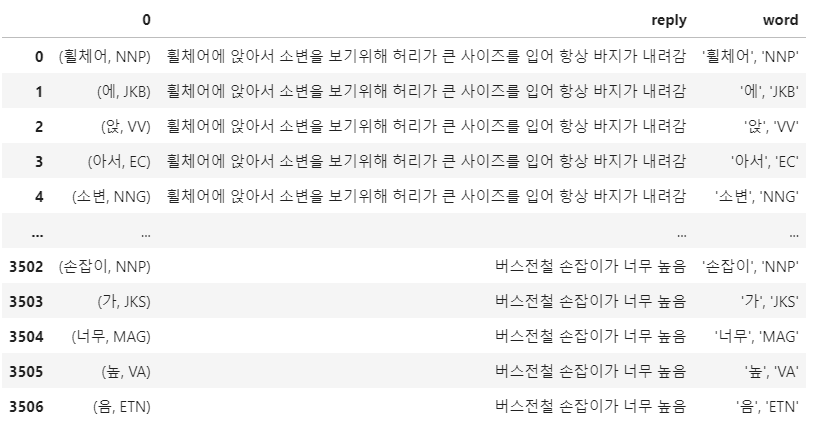

In [55]:
# 형태소 분석(komoran)
line3 = []

for i in range(len(checked_sent)):
    line3.append(komoran.pos(checked_sent[i]))
    
line3 = list(line3)

line3[3]

[('허리', 'NNG'),
 ('는', 'JX'),
 ('맞', 'VV'),
 ('지만', 'EC'),
 (',', 'SP'),
 ('다리', 'NNP'),
 ('길이', 'NNP'),
 ('가', 'JKS'),
 ('길', 'VA'),
 ('어', 'EC'),
 ('아동', 'NNG'),
 ('용', 'XSN'),
 ('바지', 'NNP'),
 ('착용', 'NNG')]

In [43]:
# 부착되는 품사 태그의 기호와 의미는 tagset 속성으로 확인할 수 있다.
komoran.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [48]:
# 부사만 출력
mag = []
for line3_pos in line3:
    for word, tag in line3_pos:
        if tag in ['MAG']:
            mag.append(word)
            
mag

['항상',
 '잘',
 '잘',
 '많이',
 '많이',
 '꾸준히',
 '많이',
 '너무',
 '못',
 '많이',
 '안',
 '잘',
 '제대로',
 '보다',
 '너무',
 '늘',
 '안',
 '오르락내리락',
 '다',
 '너무',
 '조금',
 '너무',
 '실은',
 '상당히',
 '모두',
 '완전히',
 '자주',
 '제대로',
 '모두',
 '너무',
 '오래',
 '다',
 '더욱',
 '특히',
 '늘',
 '가장',
 '많이',
 '잘',
 '잘',
 '많이',
 '거의',
 '현저히',
 '더',
 '좀',
 '더',
 '너무',
 '앞서',
 '대체로',
 '모두',
 '많이',
 '잘',
 '매우',
 '매우',
 '급격히',
 '매번',
 '잘',
 '항상',
 '점점',
 '너무',
 '별로',
 '잘',
 '딱',
 '높이',
 '너무',
 '너무',
 '현재',
 '너무',
 '너무',
 '스스로',
 '가장',
 '많이',
 '너무']

### 5. sen_df, pos_df 데이터 전처리 및 병합

In [189]:
# pos_df 전처리

pos_df = pd.DataFrame(pd.DataFrame(line3).stack())
pos_df.reset_index(inplace=True, col_fill=['re'])
pos_df.head()

,level_0,level_1,0
0,0,0,"(휠체어, NNP)"
1,0,1,"(에, JKB)"
2,0,2,"(앉, VV)"
3,0,3,"(아서, EC)"
4,0,4,"(소변, NNG)"


In [194]:
# sen_df 전처리

sen_df.reset_index(inplace=True)
sen_df.head()

,index,reply
0,0,휠체어에 앉아서 소변을 보기위해 허리가 큰 사이즈를 입어 항상 바지가 내려감
1,1,경직으로 인해 팔의 움직임이 힘들어 큰 사이즈를 입음
2,2,"아이수준에 맞는 이동, 학습, 의복 찾기 불편"
3,3,"허리는 맞지만, 다리길이가 길어 아동용 바지 착용"
4,4,"일반사이즈에 비해 품은 좁고, 길이는 길어 옷이 잘 맞지 않음"


In [200]:
# pos_df, sen_df 데이터 병합

mer_df = pd.merge(pos_df, sen_df, how='inner', left_on = 'level_0', right_on = 'index')[[0, 'reply']]
mer_df

,0,reply
0,"(휠체어, NNP)",휠체어에 앉아서 소변을 보기위해 허리가 큰 사이즈를 입어 항상 바지가 내려감
1,"(에, JKB)",휠체어에 앉아서 소변을 보기위해 허리가 큰 사이즈를 입어 항상 바지가 내려감
2,"(앉, VV)",휠체어에 앉아서 소변을 보기위해 허리가 큰 사이즈를 입어 항상 바지가 내려감
3,"(아서, EC)",휠체어에 앉아서 소변을 보기위해 허리가 큰 사이즈를 입어 항상 바지가 내려감
4,"(소변, NNG)",휠체어에 앉아서 소변을 보기위해 허리가 큰 사이즈를 입어 항상 바지가 내려감
...,...,...
3502,"(손잡이, NNP)",버스전철 손잡이가 너무 높음
3503,"(가, JKS)",버스전철 손잡이가 너무 높음
3504,"(너무, MAG)",버스전철 손잡이가 너무 높음
3505,"(높, VA)",버스전철 손잡이가 너무 높음


In [203]:
# 특수문자 '()' 제거 
# 사용자 정의 함수 사용
def func(x):
    result = str(x)
    return result[1:-1]

mer_df['pre_word'] = mer_df[0].apply(func)

In [207]:
mer_df[['reply', 'word']].to_excel('C:/R_pjt/public/data/생활중 불편사항 형태소 분석.xlsx')

---

#### cf. Python 한국어 맞춤범 검사기 설치

[깃허브](https://github.com/ssut/py-hanspell)

1. 위 링크에 접속해 hanspell 안의 파일을 모두 다운 받고 본인의 프로젝트 폴더에 'hanspell' 폴더를 만든다.
1. 다운 받은 4개 파일을 모두 'hanspell' 폴더에 넣는다.
1. 아래 코드를 실행한다. (pip install py-hanspell)

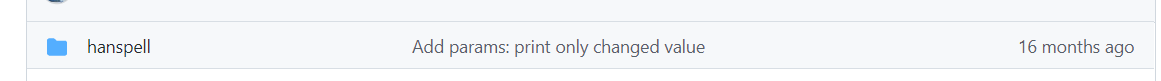

In [23]:
# pip install py-hanspell

  Using cached py-hanspell-1.1.tar.gz (3.0 kB)
  Using cached py-hanspell-1.0.tar.gz (3.0 kB)
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\user\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-frdencta\\py-hanspell_796ba05080a444b58edcafe5b5acc6bf\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-frdencta\\py-hanspell_796ba05080a444b58edcafe5b5acc6bf\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\user\AppData\Local\Temp\pip-pip-egg-info-39h_hnow'
         cwd: C:\Users\user\AppData\Local\Temp\pip-install-frdencta\py-hanspell_796ba05080a444b58edcafe5b5acc6bf\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      Fil

In [207]:
from hanspell import spell_checker

sent = "한글 맞춤법검사기 재대로작동돼는지테스트"
spelled_sent = spell_checker.check(sent)
checked_sent = spelled_sent.checked
 
print(checked_sent)

한글 맞춤법검사기 제대로 작동되는지 테스트


In [208]:
# 한글 맞춤법 검사
from hanspell import spell_checker

spelled_sent = []
checked_sent = []

for i in range(len(sen_pre)):
    spelled_sent.append(spell_checker.check(sen_pre[i]))
    checked_sent.append(spelled_sent[i].checked)
    
# checked_sent

---

#### cf. Python customized_konlpy

[참고자료1](https://github.com/lovit/customized_konlpy)  
[참고자료2](https://inspiringpeople.github.io/data%20analysis/ckonlpy/)  
[깃허브 내장 폴더 다운 받을 수 있는 사이트](https://minhaskamal.github.io/DownGit/#/home)

In [83]:
# !pip install customized_konlpy

In [78]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs('동현이는 오늘도 학교에 갑니다.')

['동', '현이', '는', '오늘', '도', '학교', '에', '갑니다', '.']

In [84]:
# twitter.add_dictionary('동현이', 'Noun')

twitter.morphs('동현이는 오늘도 학교에 갑니다.')

[('동', 'Modifier'),
 ('현이', 'Noun'),
 ('는', 'Josa'),
 ('오늘', 'Noun'),
 ('도', 'Josa'),
 ('학교', 'Noun'),
 ('에', 'Josa'),
 ('갑니다', 'Verb'),
 ('.', 'Punctuation')]

In [72]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'Modifier': '관형사',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}